# Project 3 Hassan Alam
## Goal:
Deveop framework for Multi-Variate Time Series Forecast

## Sections

Section 1: Import All Libraries<br>
Section 2: Import Alpaca Data<br>
Section 3: NewsAPI<br>
Section 4: Get Tones from IBM<br>
Section 5: Integrate data<br>
Section 6: LSTM<br>
Section 7: Dashboard<br>


## Notes - to delete
1. V 1.0 All cells working. 
2. V 1.1 Move LSTM to end
3. v 1.1.1. new sequence working
4. v 1.1.2. updated to add Section 5 in the middle for integrating all data
5  v 1.1.3 fixed in news sentiment api take info from news API
6. v 1.1.4 need to put combine 

##  <span style="color:red">Section 1: Import All Libraries

In [1]:
import alpaca_trade_api as tradeapi
import json
import numpy as np
import os
import pandas as pd
import requests

from datetime import datetime, date, timedelta
# from datetime import date
from dotenv import load_dotenv
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from keras.models import Sequential
from keras.layers import Dense, LSTM
# from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from newsapi import NewsApiClient
from numpy import concatenate
# from numpy import concatenate
from pandas import read_csv, DataFrame, concat
# from pandas import DataFrame
# from pandas import concat
from pandas.io.json import json_normalize
# import pandas as pd
from pandas import read_csv
from pathlib import Path
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


%matplotlib inline
load_dotenv('test1.env')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Hassan\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


True

##  <span style="color:red">Section 2: Import Alpaca Data

### Section 2.1 TBD
Import last one month from Alpacaa based on stock.<br>
Function global variable that is stock.

### Section 2.2 
Currently reads file. Need to put in Alpaca

In [2]:
# csv_path = Path("../Resources/trading_signals.csv")
csv_path = Path ("./sp500_close_2020-2021.csv", infer_datetime_format = True,  parse_dates=True, index_col='time')
SP500_close = read_csv(csv_path)
# raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
SP500_close['time'] = pd.to_datetime (SP500_close['time'])
SP500_close.set_index('time', inplace = True)
# SP500_close = SP500_close.iloc[:, 1:]
SP500_close.head()


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02 05:00:00+00:00,85.95,29.09,159.40,300.58,89.57,85.09,168.81,86.94,210.15,334.48,...,62.38,101.69,70.900,56.94,79.87,102.18,149.20,259.14,52.44,134.150
2020-01-03 05:00:00+00:00,84.53,27.65,159.48,297.38,88.67,83.99,166.75,85.84,209.76,331.71,...,62.68,99.31,70.320,56.30,80.29,101.84,148.75,256.10,51.70,134.110
2020-01-06 05:00:00+00:00,84.78,27.32,156.82,299.78,89.40,85.25,179.07,86.33,208.43,333.71,...,62.59,97.23,70.870,56.61,79.81,101.79,147.95,258.01,51.07,133.100
2020-01-07 05:00:00+00:00,85.09,27.22,154.95,298.27,88.87,84.63,180.36,85.87,203.92,333.51,...,62.46,99.46,70.280,56.91,79.50,101.97,147.83,256.47,50.74,133.600
2020-01-08 05:00:00+00:00,85.91,27.84,153.15,303.15,89.52,85.45,178.72,86.21,204.37,337.92,...,62.42,99.19,69.235,57.51,79.78,102.14,149.59,247.63,51.26,133.325


### 2.x Do pct change

In [ ]:
# not used. use later do not dlete - uncompete
# df_pct_change = SP500_close.pct_change().dropna(how='all')
# # SP500_close.pct_change()
# df_pct_change.head()

### 2.x Do Fraction and log change

In [3]:
SP500_close.shift().head(5)
df_change = SP500_close/SP500_close.shift()
df_log_change = np.log(SP500_close/SP500_close.shift())


### 2.x select sub setion of columns

In [4]:
num_of_cols = 5
raw_df = df_log_change.iloc[:, : num_of_cols]
# raw_df.head()

2. xx Change index to day

In [5]:
date_index_df = raw_df.copy()
# test.index = pd.to_datetime(test.index, format = '%Y-%m-%d')
date_index_df.index = date_index_df.index.strftime('%Y-%m-%d')
# date_index_df.head(2)
date_index_df.dropna(inplace = True, how = 'all')

In [63]:
# delete
# print (f' original shape: {date_index_df.shape}')
# date_index_df_copy = date_index_df.copy()
# date_index_df_copy.dropna(inplace = True, how = 'all')
# print (f'copy shape {date_index_df_copy.shape}')

 original shape: (84, 5)
copy shape (83, 5)


## <span style="color:red">Section 3: NewsAPI

### 3.1. 
1. parameterize topic for query
2. current system only does last 30 days.. once code is done download last 3 years to get test data on all stocks
3. Need to synchronize with stock time data
4. delete all oil info

In [10]:
# from newsapi import NewsApiClient

In [6]:
# Create a newsapi client
api_key = os.getenv("news_api")
newsapi = NewsApiClient(api_key=api_key)

In [ ]:
# delete
# Fetch top news articles about oil
# put name here.. change this lae
# query = 'oil'
# topic_headline = newsapi.get_top_headlines(q="oil")
# topic_headline

In [ ]:
# # delete
# # Fetch top news articles about oil
# oil_headlines = newsapi.get_top_headlines(q="oil")
# oil_headlines

In [ ]:
# # delete
# # Transform the response dictionary to a DataFrame
# topic_df = pd.DataFrame.from_dict(topic_headline["articles"])

# topic_df.head()

In [ ]:
# Transform the response dictionary to a DataFrame
# delete
# oil_df = pd.DataFrame.from_dict(oil_headlines["articles"])

# oil_df.head()

In [ ]:
# delete
# from datetime import datetime, timedelta   

In [7]:
# can only get 30 days of data without paid accoutn
# set start date to 30 days ago
from_date = (date.today()- timedelta(30)).strftime("%Y-%m-%d")
#set endate as today
to_date = date.today().strftime("%Y-%m-%d")
# this is current topic. parameterize this
query = "google"
all_articles = newsapi.get_everything(q=query,language='en',
        sort_by='relevancy',from_param=from_date,to=to_date)

In [ ]:
# delete
# from datetime import datetime, timedelta   
# print (date.today())
# date.today().strftime("%Y-%m-%d")
# (date.today()- timedelta(30)).strftime("%Y-%m-%d")

In [8]:
# delete
art_df = pd.DataFrame.from_dict(all_articles['articles'])
art_df.head(2)
art_df['date'] = art_df['publishedAt'].apply (lambda x: x[:10])
# art_df['date']

In [9]:
def sort_news (in_news):
    '''
    loop through artiles in news api and sort by date.
    create data frame 
    one dataframe with full content
    second with text and date only
    '''
    #convert articles to dataframe
    art_df = pd.DataFrame.from_dict(all_articles['articles'])
    #change to a date string
#     df['age']=df.apply(lambda x: x['age']+3,axis=1)
    # create a column text that concats title descripiton and content
    art_df ['text'] = art_df['title'] + " " + art_df['description'] + " " + art_df['content']
    art_df['date'] = art_df['publishedAt'].apply (lambda x: x[:10])
    #sort by date
    art_df.sort_values (by=['date'], inplace = True)
    #concat all text by date
    text_df = art_df.groupby('date')['text'].apply (lambda x: ','.join (x)).reset_index()
    return art_df, text_df
    
    

In [12]:
art_df, text_df = sort_news(all_articles)
# text_df.head(5)

In [13]:
test_text = text_df.copy()
test_text.set_index('date', drop = True, inplace = True)
# test_text.head()

In [ ]:
# delete
# test_text = text_df.copy()
# test_text.set_index('date', drop = True, inplace = True)
# test_text.head()

#### 3.2.2 combine data with news and and convert NA text to ''


In [19]:
news_price = pd.concat([date_index_df, test_text], axis = 1, join = "outer")
news_price['text'] = news_price['text'].fillna(value = 'no items in news today ' + query)
news_price.tail(20)

C:\Users\Hassan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,AAL,AAP,AAPL,ABBV,text
2020-04-24,0.009019,0.004866,0.036371,0.028972,0.018715,no items in news today google
2020-04-27,0.006580,-0.026563,0.011583,0.001060,0.012954,no items in news today google
2020-04-28,-0.010416,0.115676,0.016755,-0.016661,-0.023294,no items in news today google
2020-04-29,0.042681,0.112440,0.032051,0.032701,0.011894,no items in news today google
2020-04-30,-0.026771,-0.047957,-0.033457,0.021176,-0.019781,no items in news today google
2020-05-01,-0.032885,-0.121119,-0.035473,-0.016877,0.010663,no items in news today google
2021-08-03,NaN,NaN,NaN,NaN,NaN,France Cracked Down on Google’s Ad Tech. What’...
2021-08-05,NaN,NaN,NaN,NaN,NaN,Everything You Need to Know About Google Drive...
2021-08-07,NaN,NaN,NaN,NaN,NaN,Google reportedly planning a new Silicon Valle...
2021-08-08,NaN,NaN,NaN,NaN,NaN,What You Should Know About the Google Play Sto...


## <span style="color:red">Section 4: Get Tones from IBM

4.1 Read the Keys

In [20]:
# Get the Tone Analyzer API Key and URL
# todo make into function
tone_api = os.getenv("TONE_ANALYZER_APIKEY")
tone_url = os.getenv("TONE_ANALYZER_URL")

4.2 Initiaze IBM

In [16]:
def init_ibm():
    '''
    code to initialize IBM netork
    '''
    #load environment
    load_dotenv('ibm-credentials.env')
    # Initialize Tone Analyser Client

    # Create authentication object
    authenticator = IAMAuthenticator(tone_api)

    # Create tone_analyzer instance
    tone_analyzer = ToneAnalyzerV3(
        version="2017-09-21",
        authenticator=authenticator                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
    )

    # Set the service endpoint
    tone_analyzer.set_service_url(tone_url)
    return tone_analyzer

4.3 Function to create tone for each line of text and create a series<br>
todo handle if there is no tone

In [29]:
def create_tone_series(in_text):
    '''
    Takes a text and generates a series of tones based on tonlist
    need to make sure IBM network is alived
    in_text = text to be analzye
    in_tn = tone analyzer
    
    '''
    #set error variabes
    sent_tone = False
    doc_tone = False
    
    #analzye the doe
    tone_analysis = tone_analyzer.tone(
        {"text": in_text},
        content_type="application/json",
        content_language="en",
        accept_language="en",
    ).get_result()
    
    # debug
    #print (f'in_text: {in_text}\n')
    # print (f'json dumpgs {json.dumps(tone_analysis, indent=2)}\n')
 
    #define list of tones
    tone_list = ['excited', 'frustrated','impolite', 'polite', 'sad', 'satisfied', 'sympathetic', 
             'anger', 'disgust', 'fear', 'joy', 'sadness',
            'analytical', 'confident', 'tentative',
            'openness_big5', 'conscientiousness_big5', 'extraversion_big5', 'agreeableness_big5',  'emotional_range_big5']
    #create tone df with all zeros
    zero_df = pd.DataFrame(0, index=np.arange(1), columns=tone_list)
    
    #create sentence tone df
    # check if there is a sensettone, then put 
    try:
        sentences_tone_df = json_normalize(
            data=tone_analysis["sentences_tone"],
            record_path=["tones"],
            meta=["sentence_id", "text"],
            )
        if not(sentences_tone_df.empty):
            sent_tone = True
        
    except:
        set_tone = False
    
    #change it to a dataframe
    try:
        doc_tone_df = json_normalize(data=tone_analysis["document_tone"], record_path=["tones"])
        #debug 
         #print (f'doc_tone_df is true: {doc_tone_df}\n')
        if not(doc_tone_df.empty):
            doc_tone = True
    except:
        doc_tone = False
        
    
    #creae summary fo all tones
    # debug print (f'sent_done: {sent_tone}\n')
    # debug print (f'doc_tone: {doc_tone}\n')
    if sent_tone:
        tsp_df = sentences_tone_df.groupby('tone_id').sum().transpose()
    elif doc_tone:
        tsp_df = doc_tone_df.groupby('tone_id').sum().transpose()
    else:
        # blank
        return zero_df.iloc[0]

    

    #replace falues from tone_df
    zero_df [tsp_df.columns] = tsp_df[tsp_df.columns].values
       
    # debug print (f'zero_df[0]: {zero_df.iloc[0]}\n')  

    return zero_df.iloc[0]

In [26]:
# for testing should be able to delete
# Initialize Tone Analyser Client

# Create authentication object
authenticator = IAMAuthenticator(tone_api)

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

In [ ]:
# for testing ,should be able to delete
# Define text to analyze
# test 
# do we need this
text = """
Team, I know that times are tough! 
Product sales have been disappointing for the past three quarters. 
We have a competitive product, but we need to do a better job of selling it!
"""
# text = """Team, I know that times are tough!"""

# Analyze the text's tone with the 'tone()' method.
tone_analysis = tone_analyzer.tone(
    {"text": text},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
print(json.dumps(tone_analysis, indent=2))

In [50]:
# for testing should be able to delete
# Document Tones
doc_tone_df = json_normalize(data=tone_analysis["document_tone"], record_path=["tones"])
# doc_tone_df

In [66]:
# for testing, should be able to delte
# Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df

,score,tone_id,tone_name,sentence_id,text
0,0.801827,analytical,Analytical,0,"Team, I know that times are tough!"
1,0.771241,sadness,Sadness,1,Product sales have been disappointing for the ...
2,0.687768,analytical,Analytical,1,Product sales have been disappointing for the ...
3,0.506763,analytical,Analytical,2,"We have a competitive product, but we need to ..."


In [27]:
# test_df = sentences_tone_df.copy()

tone_list = ['excited', 'frustrated','impolite', 'polite', 'sad', 'satisfied', 'sympathetic', 
             'anger', 'disgust', 'fear', 'joy', 'sadness',
            'analytical', 'confident', 'tentative',
            'openness_big5', 'conscientiousness_big5', 'extraversion_big5', 'agreeableness_big5',  'emotional_range_big5']
tone_analyzer = init_ibm()

In [89]:
# delete
news_price.sample(10)

,A,AAL,AAP,AAPL,ABBV,text
2020-01-08,0.009591,0.022522,-0.011685,0.016229,0.007287,no items in news today
2020-04-08,0.035301,0.103352,0.027402,0.025333,0.042654,no items in news today
2020-02-27,-0.009132,-0.080229,-0.003648,-0.069496,-0.035627,no items in news today
2021-08-12,NaN,NaN,NaN,NaN,NaN,Samsung's Galaxy Z Flip 3 will be the first fo...
2021-08-20,NaN,NaN,NaN,NaN,NaN,Google is shutting down its Android Auto mobil...
2021-08-19,NaN,NaN,NaN,NaN,NaN,Google says geofence warrants make up one-quar...
2020-02-28,-0.004273,-0.077738,-0.008089,0.005843,0.003334,no items in news today
2020-01-03,-0.016659,-0.050769,0.000502,-0.010703,-0.010099,no items in news today
2021-08-18,NaN,NaN,NaN,NaN,NaN,Google’s Fuchsia OS is rolling out to every fi...
2021-08-25,NaN,NaN,NaN,NaN,NaN,"Otter.ai can transcribe Microsoft Teams, Googl..."


In [30]:
# main set to attach tones to dataframe

test_df = news_price.copy()

test_df[tone_list] = test_df['text'].apply(lambda x: create_tone_series(x))

test_df.head()

,A,AAL,AAP,AAPL,ABBV,text,excited,frustrated,impolite,polite,...,joy,sadness,analytical,confident,tentative,openness_big5,conscientiousness_big5,extraversion_big5,agreeableness_big5,emotional_range_big5
2020-01-03,-0.016659,-0.050769,0.000502,-0.010703,-0.010099,no items in news today google,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,0.002953,-0.012007,-0.016820,0.008038,0.008199,no items in news today google,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-07,0.003650,-0.003667,-0.011996,-0.005050,-0.005946,no items in news today google,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-08,0.009591,0.022522,-0.011685,0.016229,0.007287,no items in news today google,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-09,0.015592,0.003943,-0.001765,0.021409,0.007678,no items in news today google,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# todo change testdf to text info
test_df = sentences_tone_df.copy()
# test_df[tone_list] = test_df['text'].apply(create_tone_series)
# appiled_df = df.apply(lambda row: fn(row.text), axis='columns', result_type='expand') 
test_df[tone_list] = test_df['text'].apply(lambda x: create_tone_series(x))
# # df.merge(df.textcol.apply(lambda s: pd.Series({'feature1':s+1, 'feature2':s-1})), 
#     left_index=True, right_index=True)
# test_df.merge(test_df.textcol.apply(lambda s:create_tone_series(x)), left_index=True, right_index=True)
# test_df.head()

In [47]:
# # delete
# test_df = sentences_tone_df.copy()
# # test_df[tone_list] = test_df['text'].apply(create_tone_series)
# # appiled_df = df.apply(lambda row: fn(row.text), axis='columns', result_type='expand') 
# test_df[tone_list] = test_df['text'].apply(lambda x: create_tone_series(x))
# # # df.merge(df.textcol.apply(lambda s: pd.Series({'feature1':s+1, 'feature2':s-1})), 
# #     left_index=True, right_index=True)
# # test_df.merge(test_df.textcol.apply(lambda s:create_tone_series(x)), left_index=True, right_index=True)
# test_df.head()

,score,tone_id,tone_name,sentence_id,text,excited,frustrated,impolite,polite,sad,...,joy,sadness,analytical,confident,tentative,openness_big5,conscientiousness_big5,extraversion_big5,agreeableness_big5,emotional_range_big5
0,0.801827,analytical,Analytical,0,"Team, I know that times are tough!",0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.801827,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.771241,sadness,Sadness,1,Product sales have been disappointing for the ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.771241,0.687768,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.687768,analytical,Analytical,1,Product sales have been disappointing for the ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.771241,0.687768,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.506763,analytical,Analytical,2,"We have a competitive product, but we need to ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.506763,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style="color:red">Section 5 Combine Data

## <span style="color:red">Section 6: LSTM</span>.

### 6.1 Notes
1. it takes raw df, change to a fucntion
2. imports on top may not be necessary or should be pulled into top
3. Make into a function

value shape: (84, 5)
reframe shape: (82, 6)


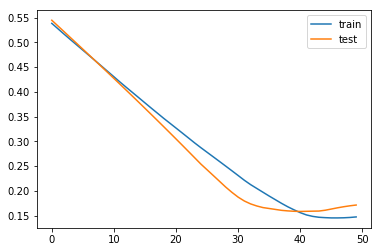

inv_y shape: (25, 5)
Test RMSE: 0.040


In [27]:
# delete
# from math import sqrt
# from numpy import concatenate
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
 
# # convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = DataFrame(data)
#     cols, names = list(), list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
#         else:
#             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
#     # put it all together
#     agg = concat(cols, axis=1)
#     agg.columns = names
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg
 
# # load dataset
# # dataset = read_csv('pollution.csv', header=0, index_col=0)
# dataset = raw_df
# values = dataset.values
# # integer encode direction

# # take this out
# # encoder = LabelEncoder()
# # values[:,4] = encoder.fit_transform(values[:,4])

# # ensure all data is float
# values = values.astype('float32')
# # normalize features

# # debug
# print (f'value shape: {values.shape}') #debug

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
# # drop columns we don't want to predict

# # redo this secttion
# # reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# ## num_col_to_drop = lstm_input.shape[1] - scaled_data.shape[1]
# #### drop the columns at the end
# ## lstm_input = lstm_input.iloc[:, : - num_col_to_drop]

# #above 
# #calculate the number of columns to drop
# num_col_to_drop =  reframed.shape[1] - dataset.shape[1] -1
# # drop the clast columns
# reframed = reframed.iloc[:, : -num_col_to_drop]
# print (f'reframe shape: {reframed.shape}')
# #

# # print(reframed.head())
 
# # split into train and test sets
# values = reframed.values

# # redo this section
# # n_train_hours = 365 * 24
# # train = values[:n_train_hours, :]
# # test = values[n_train_hours:, :]

# # redone here
# # set test_fraction (set it to 0.7)
# test_fract = 0.7
# split = int(test_fract * len(values))
# train = values[:split, :]
# test = values [split:, :]


# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# # print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam')
# # fit network
# # change verbose to zo
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=False)

# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()
 
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

# # debug
# print (f'inv_y shape: {inv_yhat.shape}')

# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

### 6.x create chart of actual vs predicted
1. remove all items called and change raw df to log 

value shape: (83, 5)
reframe shape: (82, 6)


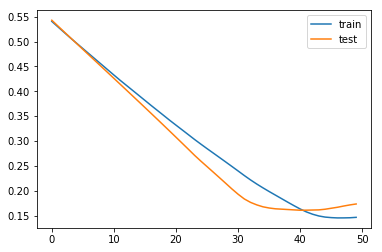

inv_y shape: (25, 5)
Test RMSE: 0.040


In [65]:
# from math import sqrt
# from numpy import concatenate
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# dataset = raw_df
dataset = date_index_df
values = dataset.values
# integer encode direction

# take this out
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')
# normalize features

# debug
print (f'value shape: {values.shape}') #debug

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

# redo this secttion
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
## num_col_to_drop = lstm_input.shape[1] - scaled_data.shape[1]
#### drop the columns at the end
## lstm_input = lstm_input.iloc[:, : - num_col_to_drop]

#above 
#calculate the number of columns to drop
num_col_to_drop =  reframed.shape[1] - dataset.shape[1] -1
# drop the clast columns
reframed = reframed.iloc[:, : -num_col_to_drop]
print (f'reframe shape: {reframed.shape}')
#

# print(reframed.head())
 
# split into train and test sets
values = reframed.values

# redo this section
# n_train_hours = 365 * 24
# train = values[:n_train_hours, :]
# test = values[n_train_hours:, :]

# redone here
# set test_fraction (set it to 0.7)
test_fract = 0.7
split = int(test_fract * len(values))
train = values[:split, :]
test = values [split:, :]


# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
# change verbose to zo
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

# debug
print (f'inv_y shape: {inv_yhat.shape}')

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

## Section 7 Dashboard